In [2]:
# Install Tesseract and required Python packages
!apt-get install -y tesseract-ocr
!pip install pytesseract Pillow
# Load a pretrained sentiment-analysis pipeline
from transformers import pipeline
nlp = pipeline("sentiment-analysis")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0


In [3]:
# Example sentence
sentence = "I absolutely love using neural networks in my daily tasks!"

# Get sentiment result
result = nlp(sentence)
print("Sentiment Analysis Result:", result)

Sentiment Analysis Result: [{'label': 'POSITIVE', 'score': 0.999656081199646}]


Displaying downloaded image:


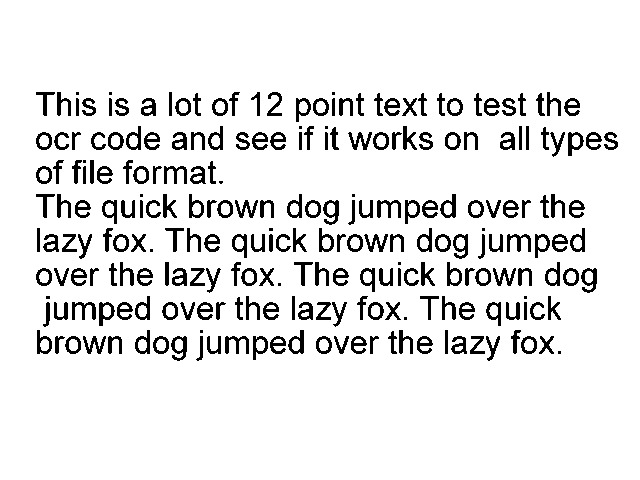

Extracted Text:
 This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



In [4]:
import pytesseract
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display

# URL of the test image
image_url = "https://raw.githubusercontent.com/madmaze/pytesseract/master/tests/data/test.jpg"

# Download the image from the raw URL
response = requests.get(image_url)
if response.status_code == 200:
    try:
        image = Image.open(BytesIO(response.content))
        print("Displaying downloaded image:")
        display(image)  # Display the image in Colab
    except Exception as e:
        print("Error opening the image:", e)
else:
    print("Error downloading the image, status code:", response.status_code)

# Perform OCR if the image was loaded successfully
if 'image' in locals():
    extracted_text = pytesseract.image_to_string(image)
    print("Extracted Text:\n", extracted_text)
else:
    print("No image available to process.")

Processing Dog image:
Predicted label for Dog: Samoyed

Processing Cat image:
Predicted label for Cat: tiger cat

Processing Bird image:
Predicted label for Bird: brambling

Processing Car image:
Predicted label for Car: sports car



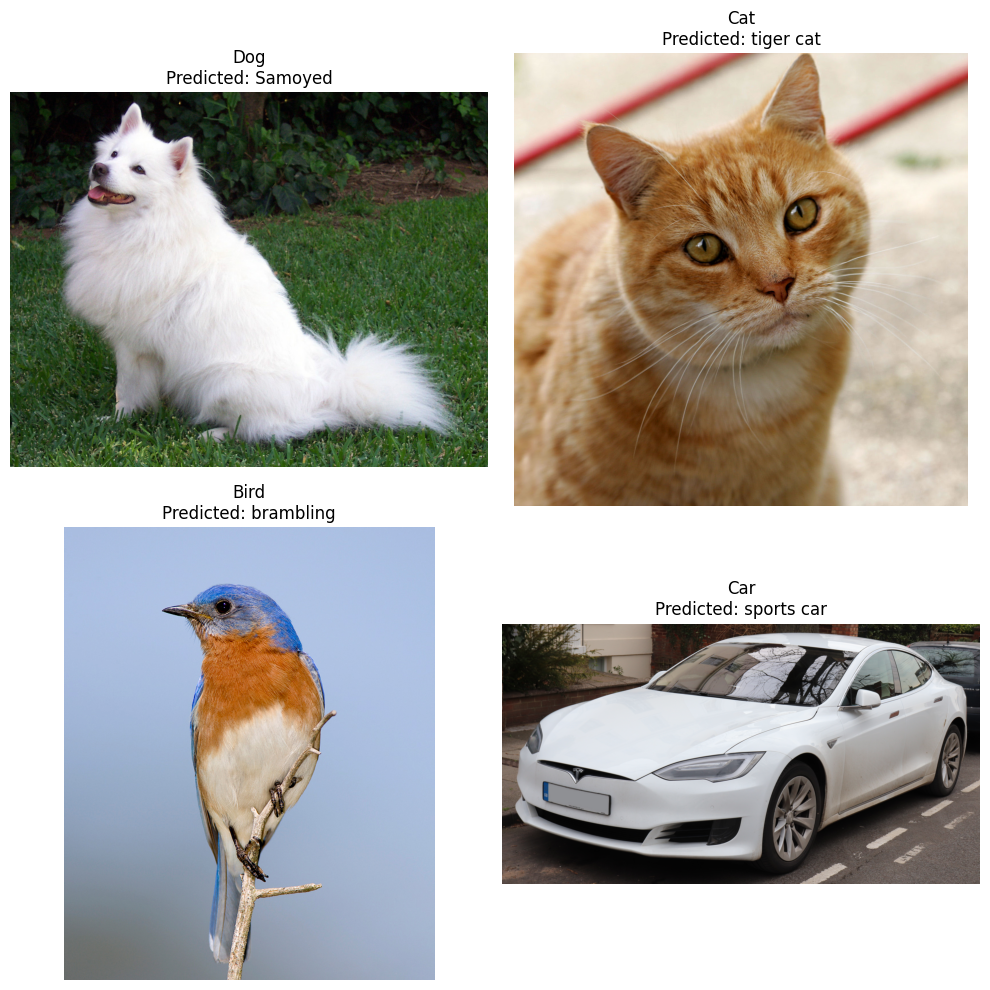

In [8]:
import torch
from torchvision import models, transforms
from PIL import Image
import requests
from io import BytesIO
import json
import matplotlib.pyplot as plt

# Dictionary of image URLs to process
image_urls = {
    "Dog": "https://github.com/pytorch/hub/raw/master/images/dog.jpg",
    "Cat": "https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg",
    "Bird": "https://upload.wikimedia.org/wikipedia/commons/1/1a/7Z1E5531.jpg",
    "Car": "https://upload.wikimedia.org/wikipedia/commons/5/5d/2016_Tesla_Model_S_75_Front.jpg"
}

# Headers to avoid 403 errors
headers = {"User-Agent": "Mozilla/5.0"}

# Define image preprocessing transformations
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Load the pretrained ResNet-50 model with the recommended weights
weights = models.ResNet50_Weights.IMAGENET1K_V1
model = models.resnet50(weights=weights)
model.eval()

# Download ImageNet class labels mapping
labels_url = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
response = requests.get(labels_url, headers=headers)
labels = json.loads(response.text)

# Prepare lists to store images and their predicted labels
images = []
predictions = []
names = []

# Loop over each image URL, process, and classify
for name, url in image_urls.items():
    print(f"Processing {name} image:")
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        try:
            img = Image.open(BytesIO(response.content)).convert("RGB")
        except Exception as e:
            print("Error opening the image:", e)
            continue
    else:
        print("Error downloading the image, status code:", response.status_code)
        continue

    # Preprocess the image and run inference
    img_t = preprocess(img)
    batch_t = torch.unsqueeze(img_t, 0)
    with torch.no_grad():
        out = model(batch_t)
    _, index = torch.max(out, 1)
    predicted_label = labels[index.item()]
    print(f"Predicted label for {name}: {predicted_label}\n")

    # Append the image and prediction to lists
    images.append(img)
    predictions.append(predicted_label)
    names.append(name)

# Plot images as a 2x2 collage using Matplotlib
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for i in range(len(images)):
    axs[i].imshow(images[i])
    axs[i].set_title(f"{names[i]}\nPredicted: {predictions[i]}", fontsize=12)
    axs[i].axis("off")

plt.tight_layout()
plt.show()


0: 384x640 3 cars, 1 truck, 13.8ms
Speed: 3.4ms preprocess, 13.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


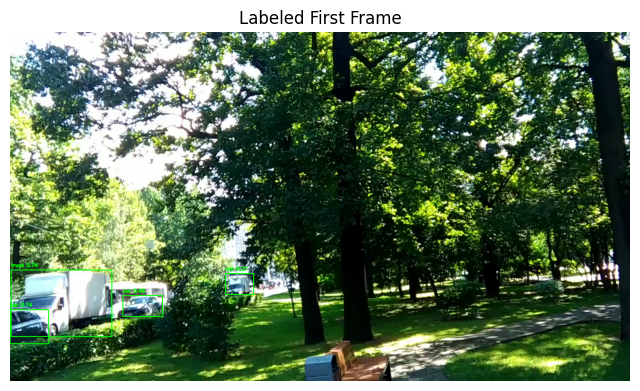


0: 384x640 3 cars, 1 truck, 26.8ms
Speed: 3.6ms preprocess, 26.8ms inference, 7.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 15.0ms
Speed: 10.5ms preprocess, 15.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 26.6ms
Speed: 9.4ms preprocess, 26.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 16.2ms
Speed: 6.3ms preprocess, 16.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 14.4ms
Speed: 6.1ms preprocess, 14.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 10.6ms
Speed: 7.6ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 19.9ms
Speed: 7.9ms preprocess, 19.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 11.0ms
Speed: 7.3ms preprocess, 11.0ms 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import cv2
import torch
import urllib.request
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files

# Check for CUDA availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load YOLOv8 model (pre-trained on COCO dataset)
model = YOLO('yolov8n.pt').to(device)  # 'yolov8n.pt' is the lightweight version

# Load video from network URL
video_url = 'https://samplelib.com/lib/preview/mp4/sample-5s.mp4'  # Replace with your desired URL
video_path = 'traffic.mp4'
urllib.request.urlretrieve(video_url, video_path)

# Open video capture
cap = cv2.VideoCapture(video_path)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Process the first frame for display
ret, first_frame = cap.read()
if ret:
    results = model(first_frame, device=device)
    # Draw detections on the first frame
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0].item()
            cls = int(box.cls[0].item())
            label = model.names[cls]

            cv2.rectangle(first_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(first_frame, f'{label} {conf:.2f}', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the labeled first frame using matplotlib (large size)
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Labeled First Frame')
    plt.show()

# Reset video to start for full processing
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# Define output video writer
out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

# Process full video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, device=device)

    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0].item()
            cls = int(box.cls[0].item())
            label = model.names[cls]

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f'{label} {conf:.2f}', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    out.write(frame)

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

# Provide the final processed video for download
files.download('output.mp4')